In [1]:
import matplotlib.pyplot as plt
import json
from ast import literal_eval

In [2]:
BLOCKSIZE = 3 # the blocksize of the matrices in the folder
N_BLOCK_SPARSITY_PATTERNS = 2**(BLOCKSIZE*BLOCKSIZE)
MIN_RANK = 0
MAX_RANK = 5

result_file_name = "norne_10_years"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


reading json file: norne_10_years_rank_00.json
reading json file: norne_10_years_rank_01.json
reading json file: norne_10_years_rank_02.json
reading json file: norne_10_years_rank_03.json
reading json file: norne_10_years_rank_04.json
reading json file: norne_10_years_rank_05.json


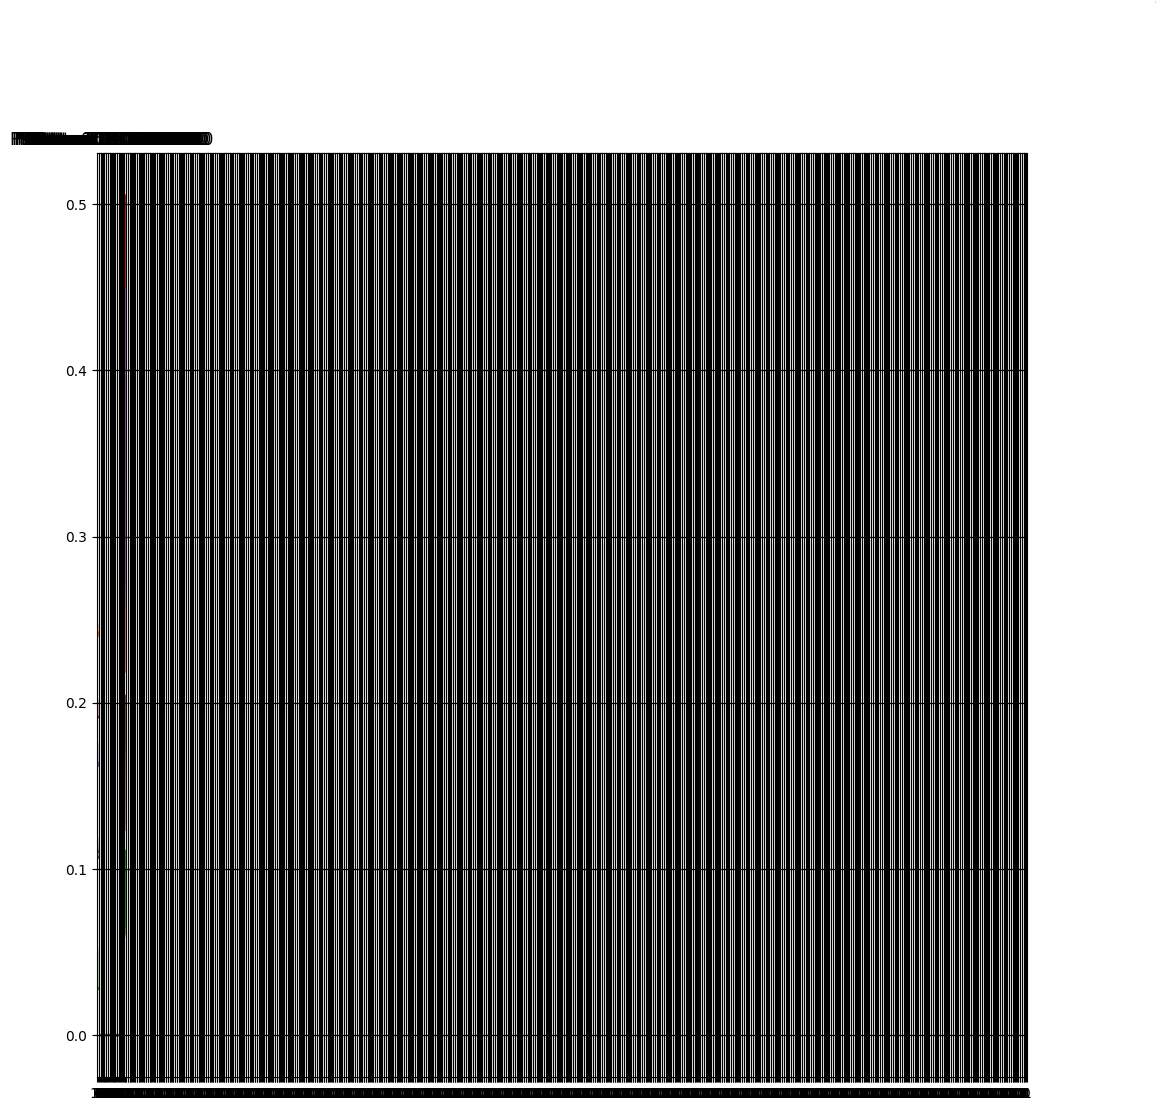

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=N_BLOCK_SPARSITY_PATTERNS, figsize=(12, 12), sharey=True)
axes = axes.flatten()
fig.legend(fontsize="1")

for rank in range(MIN_RANK, MAX_RANK+1):
    string_rank = "{:02d}".format(rank)
    json_file = f"{result_file_name}_rank_{string_rank}.json"
    print("reading json file:", json_file)

    collected_data = json.load(open(json_file))
    block_sparsity_data = [[] for i in range(N_BLOCK_SPARSITY_PATTERNS)]
    x_values = []

    cnt = 0
    for key in sorted(collected_data):
        # if the analysis failed, dont try to add data
        if len(collected_data[key]) == 1:
            continue
        else:
            # if the filename
            dot_cnt = 0
            for char in key:
                dot_cnt+=1 if char=='.' else 0
            if dot_cnt > 1:
                continue

        x_values.append(cnt)
        cnt += 1

        for i in range(N_BLOCK_SPARSITY_PATTERNS):
            # get the number of counter occurences of the ith sparsity block type
            string_form_of_list = collected_data[key]["blockSparsity"]
            list_form_of_string_of_list = literal_eval(string_form_of_list)
            num_of_occurences = list_form_of_string_of_list[i]

            # get the total number of blocks
            total_blocks = float(collected_data[key]["nnz"])/(BLOCKSIZE*BLOCKSIZE)

            # get the relative occurence to the total amount of nonzero blocks
            concentration = num_of_occurences / total_blocks

            block_sparsity_data[i].append(concentration)

    block_patterns = []
    for n in range(N_BLOCK_SPARSITY_PATTERNS):
        block_patterns.append([])

        for i in range(BLOCKSIZE):
            string = ""
            for j in range(BLOCKSIZE):
                string += "1" if (n & (1<<(i*BLOCKSIZE + j))) > 0 else "0"
            block_patterns[n].append(string)
        block_patterns[n] = ' '.join(block_patterns[n])

    for i in range(16):
        axes[i].plot(x_values, block_sparsity_data[i], label=f'{rank}')
        axes[i].set_title(f'Pattern: {block_patterns[i]}')
        # axes[i].legend()
        string_rank = "{:02d}".format(rank)

plt.savefig("MPI_block_patters")


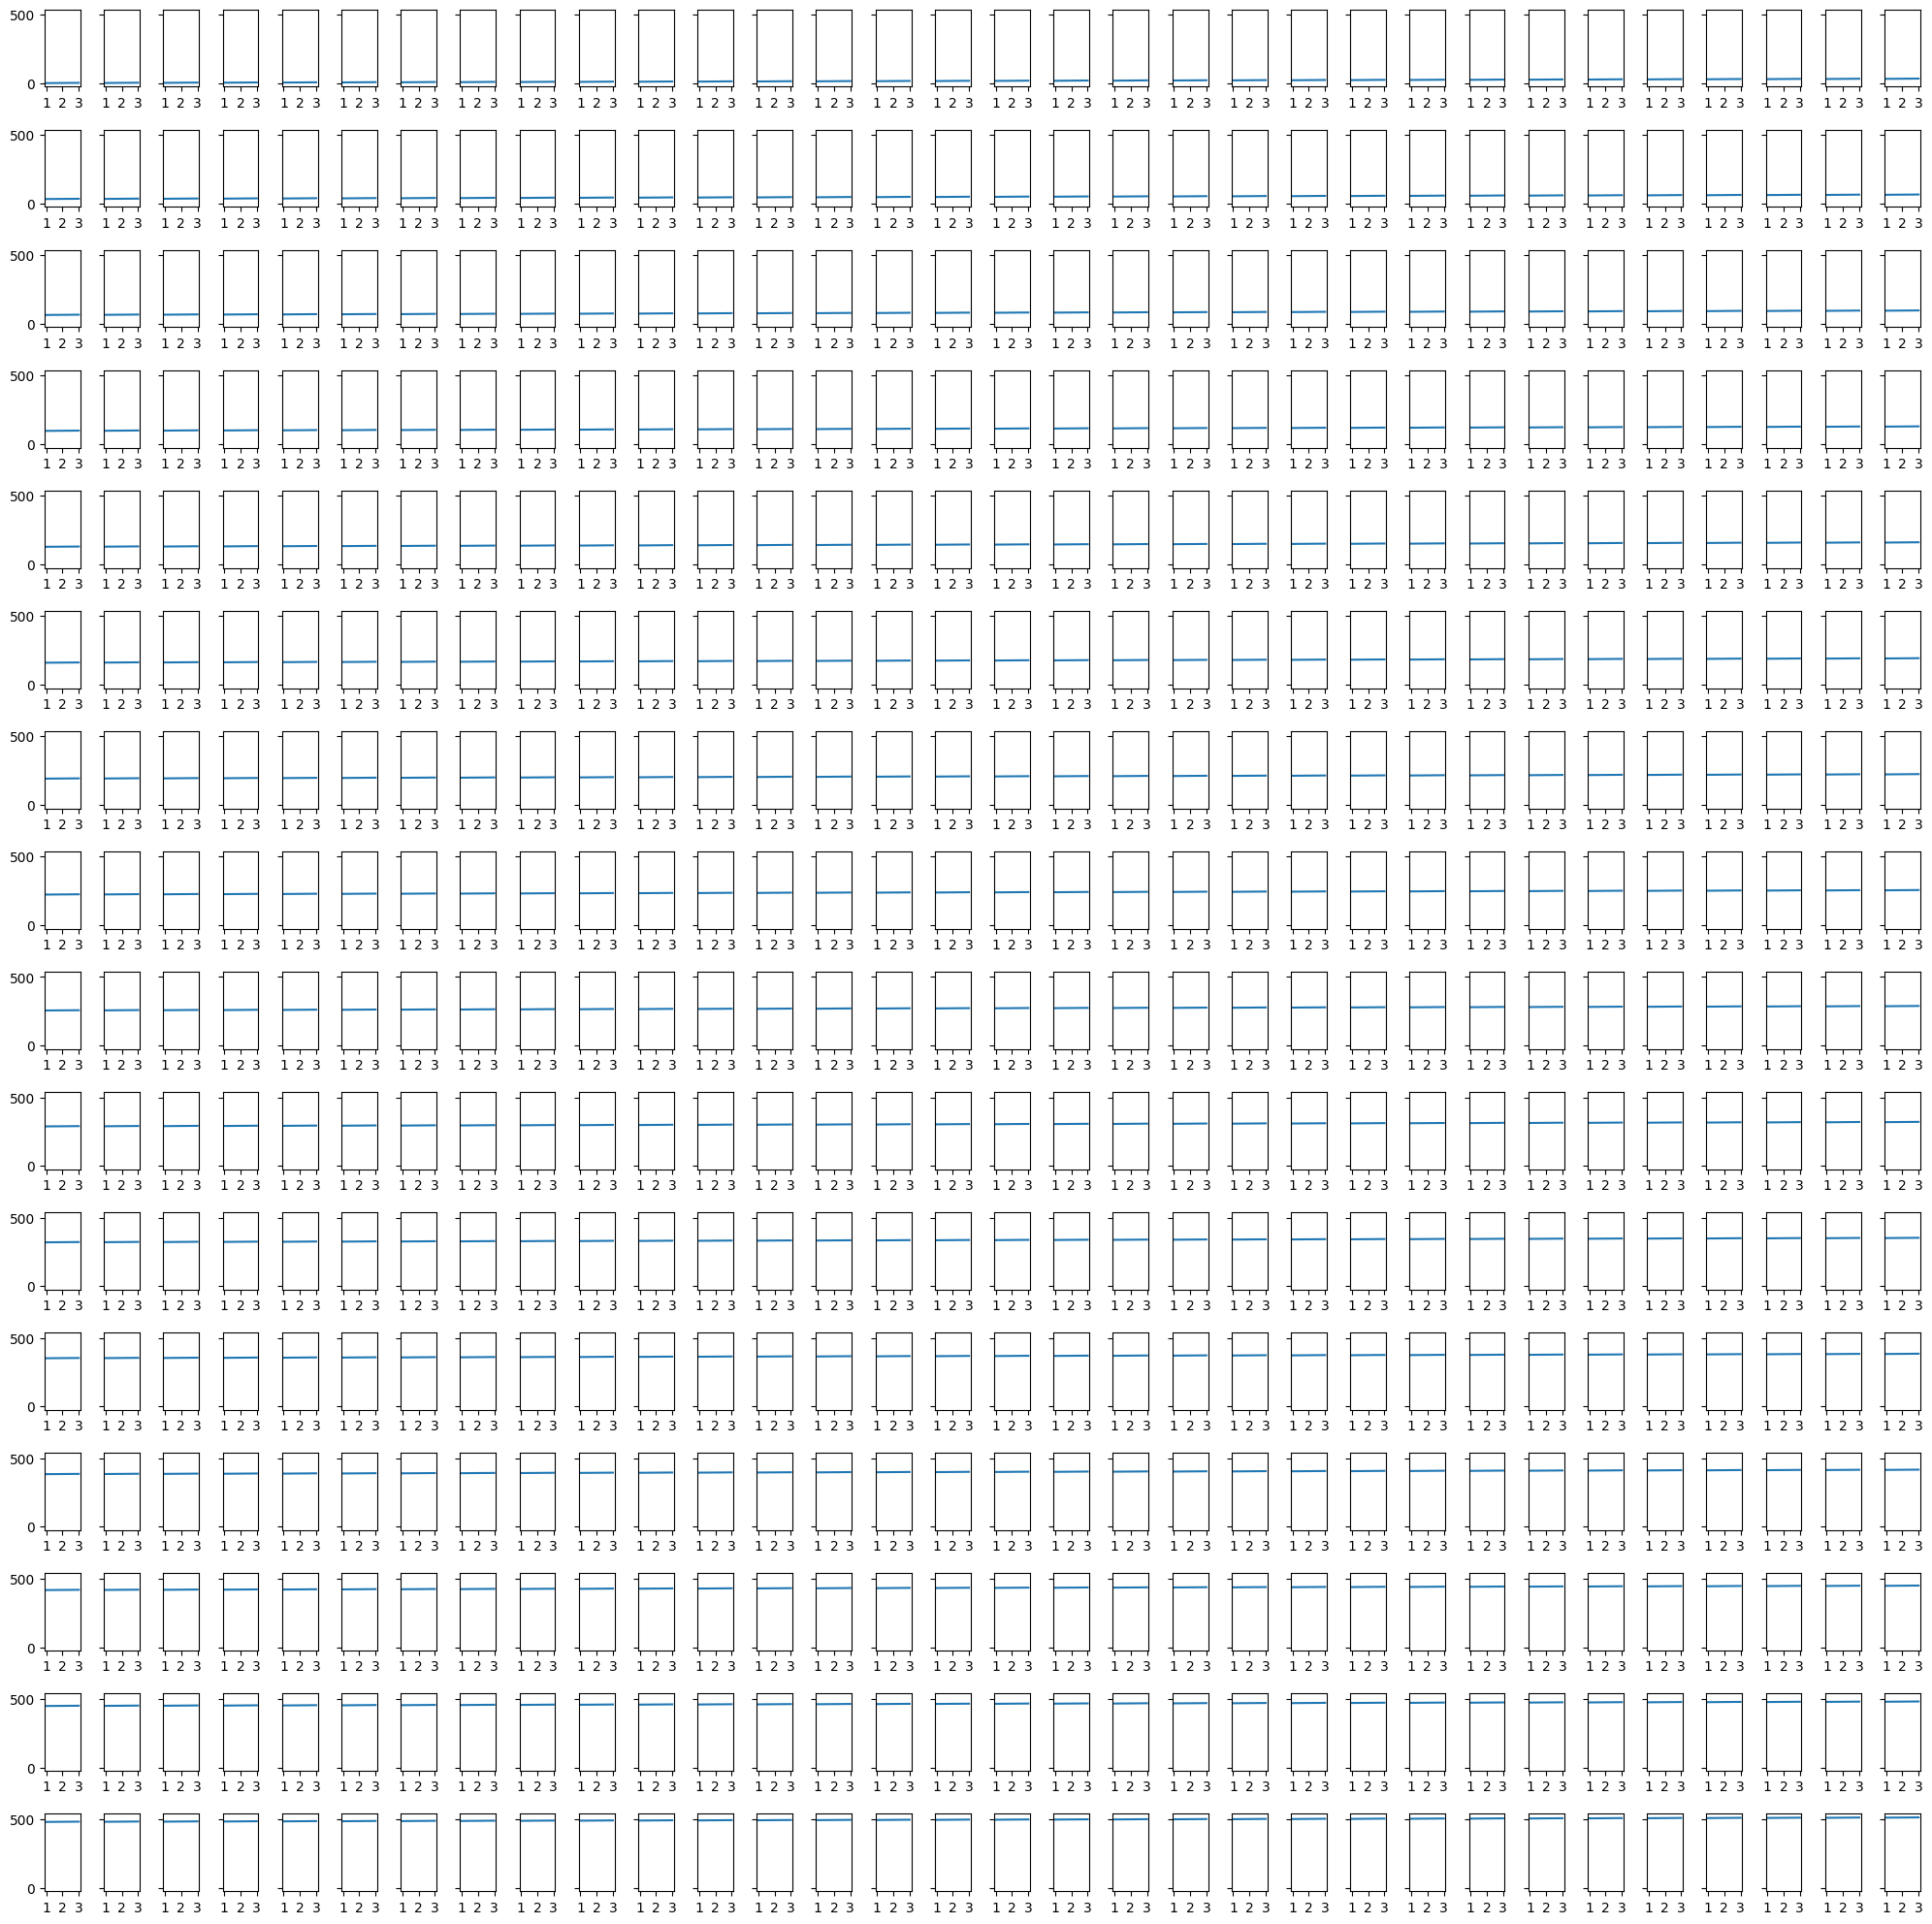

In [6]:
import matplotlib.pyplot as plt

# Number of subplots
num_subplots = 512

# Number of rows and columns in the grid
num_rows = 16
num_cols = 32

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20), sharey=True)

# Adjust layout for better spacing
plt.tight_layout()

# Plot something in each subplot (replace this with your data)
for i, ax in enumerate(axes.flatten()):
    ax.plot([1, 2, 3], [i, i + 1, i + 2], label=f'Subplot {i + 1}')

# Add a common legend
# fig.legend(loc='upper center', ncol=8)

# Show the plot
plt.show()